In [1]:
from jove.DotBashers import *
from jove.Def_DFA import *
from jove.Def_NFA import *
from jove.Def_RE2NFA import *
from jove.Def_NFA2RE import *
from jove.Def_md2mc import *

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)

You may use any of these help commands:
help(mk_nfa)
help(totalize_nfa)
help(step_nfa)
help(run_nfa)
help(ec_step_nfa)
help(Eclosure)
help(Echelp)
help(accepts_nfa)
help(nfa2dfa)
help(n2d)
help(inSets)
help(rev_dfa)
help(min_dfa_brz)

You may use any of these help commands:
help(re2nfa)

You may use any of these help commands:
help(RE2Str)
help(mk_gnfa)
help(mk_gnfa_from_D)
help(dfa2nfa)
help(del_gn

 # BDDs: Minimal DFA for Boolean function on-sets 

## Boolean functions, and viewing their on-sets as formal languages

A Boolean function f(x0,x1) admits a truth-table of four entries with the
truth-table output (called "personality") defining the function for the
standard order of enumeration of x0 and x1. For AND, taking the inputs 
x1,x0 through 00, 01, 10 and 11, the outputs of AND are 0001 (the string
0001 is its personality). The personality has $2^2$ bits (for a $2$-input
Boolean function). There are $2^{2^2} = 16$ personalities for a $2$-input
Boolean function. Each personality defines a Boolean function; thus, there
are $16$ possible Boolean functions.

In general, an $N$-input truth-table has $2^N$ 
truth-table rows and a personality of length $2^N$, thus admitting $2^{2^N}$
Boolean functions of $N$ inputs.

It is impractical (and insane) to be building truth-tables for $64$-input Boolean
functions, as it will have $2^{64}$ rows. At 80 rows per sheet of paper and 5 
grams per sheet, we will need 46-billion tons of paper to print, and even a 
newborn human baby would be dead at age 100 by the time this many pages are printed.

Yet, there is a method by which _many_ 64-input Boolean functions can be exactly
represented using representations different from truth-tables. One such representation
is called a Binary Decision Diagram.

Binary Decision Diagrams (BDD) are graph structures that summarize a Boolean function's
on-sets (sets of inputs for which the function is true). The on-set of the AND function
is {11} while that for the OR function is {01, 10, 11}.

One can read on-sets as a formal language. The language of an OR-gate is thus {01, 10, 11}
(its on-set) and the language of an AND-gate is {11}.

## Building minimal DFA for the language of on-sets

Suppose there is a 6-input Boolean function modeling a magnitude comparator that 
compares the binary value coming in through input ports x2,x1,x0 against the binary
value coming through ports y2,y1,y0.

The function is "<" where "A < B" means the usual "less than" comparison.

More specifically, we write "x2,x1,x0 < y2,y1,y0" and we interpret the word x2,x1,x0
using the standard positional binary notation (likewise also for y2,y1,y0).

Here are some examples:

* 000 < 001  because 0 is < 1  (and 0 is encoded in binary as 000 and 1 as 001)

* 010 < 110  because 2 is < 6  (and 2 is encoded as 010 while 6 is encoded as 110)

* 110 < 111  because 6 < 7

```
Here is a circuit schematic of such a comparator:

      --------
      |      |
x2 -->|      |
x1 -->|      |
x0 -->|      |
      |   <  |--> Output
y2 -->|      |
y1 -->|      |
y0 -->|      |
      |      |
      --------


```

Let us now define a language of strings of length 6 representing the values of 
x2,x1,x0,y2,y1,y0 written adjacently, such that for those x,y values, the function
outputs a 1. Call this language L.

For instance, L contains 010101 because 010 is < 101 (i.e. 2 < 5)

The reader may verify that this is the full L language written out as a regular expression.
Of the $2^6 = 64$ strings, we have 28 strings in L's language. The regular expression for L is called R, and is defined below:

R =     "(000001+000011+000111+001011+001111+\
          010011+010111+011111+100101+100111+\
          101111+110111+000010+000101+000110+\
          001010+001101+001110+010101+010110+\
          011101+011110+100110+101110+000100+\
          001100+010100+011100)"

Let us build a minimal DFA for R.

In [2]:
R    =  "(000001+000011+000111+001011+001111+\
          010011+010111+011111+100101+100111+\
          101111+110111+000010+000101+000110+\
          001010+001101+001110+010101+010110+\
          011101+011110+100110+101110+000100+\
          001100+010100+011100)"

D = min_dfa(nfa2dfa(re2nfa(R)))

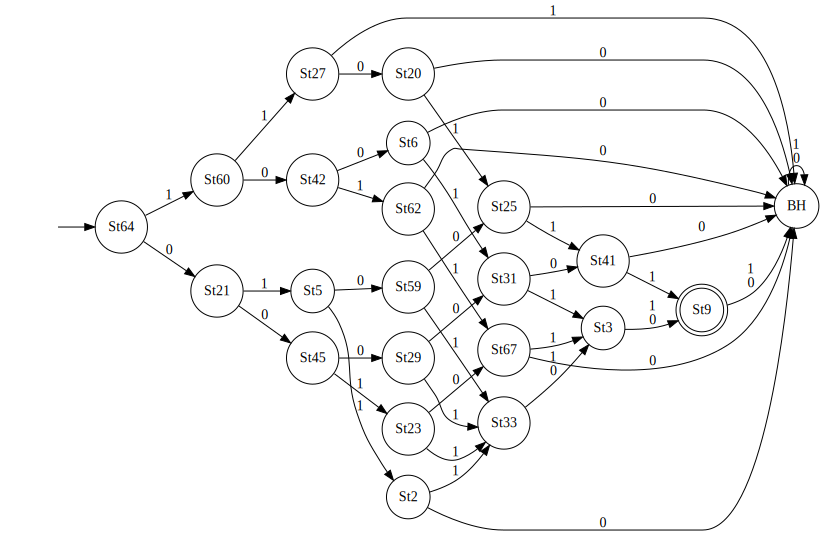

In [3]:
dotObj_dfa_w_bh(D, FuseEdges=True)

But suppose another astute person jumps in and tells us that it will be a small minimal DFA if we were to have considered strings x2,y2,x1,y1,x0,y0 to be in the language. That is, we mix the bits (and call the language Lmix, and the regular expression Rmix).

We have the following Rmix.

In [4]:
Rmix =  "(000001+000111+001101+011111+110001+\
          110111+111101+000101+000110+010111+\
          011011+011101+011110+110101+110110+\
          000100+010011+010101+010110+011001+\
          011010+011100+110100+010001+010010+\
          010100+011000+010000)" 

We still have 28 entries, but the entries now represent x2,y2,x1,y1,x0,y0. For instance,
take the fifth member of Rmix which is 110001. This means 100 < 101 which means 4 < 5, which is true. Let us now build a minimum DFA for Rmix.

In [5]:
Dmix = min_dfa(nfa2dfa(re2nfa(Rmix)))

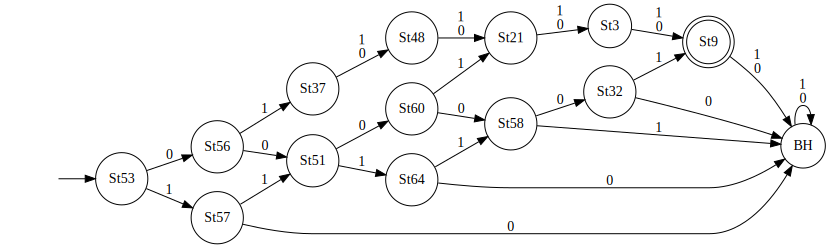

In [6]:
dotObj_dfa_w_bh(Dmix, FuseEdges=True)

We see that this minimal DFA is much smaller. The reason is that as soon as an x2 comes, a y2 bit is fed. In a positional encoding of binary numbers, this allows a DFA to immediately decide whether X < Y for X = x2x1x0 and Y = y2y1y0. 

The DFA that sees x2,x1,x0,y2,y1,y0 on the other hand cannot take a decision until bit y2 comes along. This means that this DFA has to build a full tree after seeing merely x2,x1,x0 and this would already be exponential in size. 

## Boolean subfunctions in the DFA

Each state of the minimal DFA obtained in this manner represents a Boolean function.


# Building BDDs from minimal DFA for on-set languages

A BDD is obtained from a minimal DFA by following some "cleanup" steps:

* When a 0,1 jump is made from one state to the other, short-circuit the jump
 
  - this means that whether a 0 or a 1 comes, we go to the same state. That is 
    a redundant binary decoding situation
    
* When we see two Boolean sub-functions 